In [2]:

# Step 1. Import the libraries and data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("D:\\github-d\\AI-ML\\Datasets\\kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
X=df[['bedrooms','bathrooms']].values
y=df[['price']].values.reshape(-1,1)
X,y

(array([[3.  , 1.  ],
        [3.  , 2.25],
        [2.  , 1.  ],
        ...,
        [2.  , 0.75],
        [3.  , 2.5 ],
        [2.  , 0.75]]),
 array([[221900.],
        [538000.],
        [180000.],
        ...,
        [402101.],
        [400000.],
        [325000.]]))

In [8]:
#scaling the data
X=(X-X.mean(axis=0))/X.std(axis=0)
#y=(y-y.mean())/y.std()
# Adding the Bias term 1's

Xb=np.c_[np.ones((X.shape[0],1)),X]
Xb,y



(array([[ 1.        , -0.39873715, -1.44746357],
        [ 1.        , -0.39873715,  0.1756067 ],
        [ 1.        , -1.47395936, -1.44746357],
        ...,
        [ 1.        , -1.47395936, -1.77207762],
        [ 1.        , -0.39873715,  0.50022075],
        [ 1.        , -1.47395936, -1.77207762]]),
 array([[221900.],
        [538000.],
        [180000.],
        ...,
        [402101.],
        [400000.],
        [325000.]]))

In [9]:
lr=0.01
iter=1000
# cofficient initialization
theta=np.random.rand(3,1) 


# Gradient Descent
for i in range(iter) :
    pred=Xb.dot(theta)
    error=pred-y
    grd=(2/len(y))*(Xb.T.dot(error))
    theta=theta-lr*grd
print(theta)

[[540088.14085758]
 [ 18734.28997952]
 [183120.71853449]]


MemoryError: Unable to allocate 3.48 GiB for an array with shape (21613, 21613) and data type float64

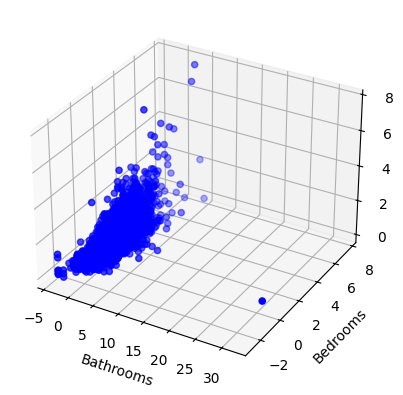

In [12]:

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Actual data')
ax.set_xlabel('Bathrooms')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

# Create a meshgrid for the plane
bathroom_plane, bedroom_plane = np.meshgrid(X[:, 0], X[:, 1])
price_plane = theta[0] + theta[1] * bathroom_plane + theta[2] * bedroom_plane

# Plot the regression plane
ax.plot_surface(bathroom_plane, bedroom_plane, price_plane, alpha=0.5, cmap='viridis', label='Regression Plane')


plt.title('Multiple Linear Regression with Gradient Descent')
plt.legend()
plt.show()